Q1 Daniel Lin 322594508

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

# i will use this function to fix the images before printing
def fix_image(image):
    clipped = np.clip(image, 0, 255)
    return clipped.astype(np.uint8)

Q1.1

In [68]:
def manual_convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.zeros((image_height + 2 * pad_height, image_width + 2 * pad_width))
    padded_image[pad_height:pad_height + image_height, pad_width:pad_width + image_width] = image

    output_image = np.zeros_like(image, dtype=np.float64)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output_image[i, j] = np.sum(region * kernel)

    return output_image

Q1.2.a

In [69]:
box_3 = np.ones((3, 3)) / 9
box_5 = np.ones((5, 5)) / 25
box_7 = np.ones((7, 7)) / 49

result_box_3 = manual_convolution(image, box_3)
result_box_5 = manual_convolution(image, box_5)
result_box_7 = manual_convolution(image, box_7)

Q1.2.b

In [70]:
def gaussian_kernel(size, sigma):
    distances_from_center = np.linspace(-(size // 2), size // 2, size)
    horizontal_distance_from_center, vertical_distance_from_center = np.meshgrid(distances_from_center, distances_from_center)

    horizontal_distance_squared = horizontal_distance_from_center ** 2
    vertical_distance_squared = vertical_distance_from_center ** 2

    distance_from_center_squared = (horizontal_distance_squared + vertical_distance_squared)
    denominator = 2 * (sigma ** 2)
    kernel = np.exp(-distance_from_center_squared / denominator)

    return kernel / np.sum(kernel)

gauss_3 = gaussian_kernel(3, 0.8)
gauss_5 = gaussian_kernel(5, 1)
gauss_7 = gaussian_kernel(7, 1.2)

result_gauss_3 = manual_convolution(image, gauss_3)
result_gauss_5 = manual_convolution(image, gauss_5)
result_gauss_7 = manual_convolution(image, gauss_7)

Q1.2.c basic sharpening kernel

In [71]:
basic_sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float64)

result_sharpen = manual_convolution(image, basic_sharpen_kernel)
result_sharpen_clipped = np.clip(result_sharpen, 0, 255)
result_sharpen_final = result_sharpen_clipped.astype(np.uint8)

Q1.2.c sobel kernels

In [72]:
sobel_x_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float64)

sobel_y_kernel = np.array([
    [-1, -2, -1],
    [0,  0,  0],
    [1,  2,  1]
], dtype=np.float64)

result_sobel_x = manual_convolution(image, sobel_x_kernel)
result_sobel_y = manual_convolution(image, sobel_y_kernel)

Q1.3

Box 7x7 - MAE: 0.856813, MSE: 27.027632


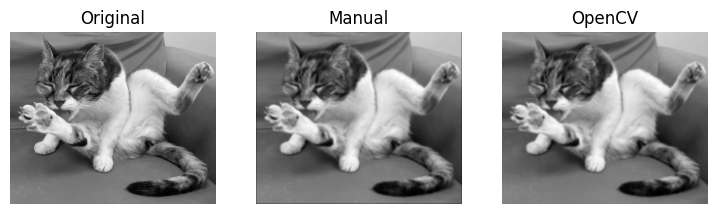

Gaussian 7x7 - MAE: 0.563352, MSE: 11.482439


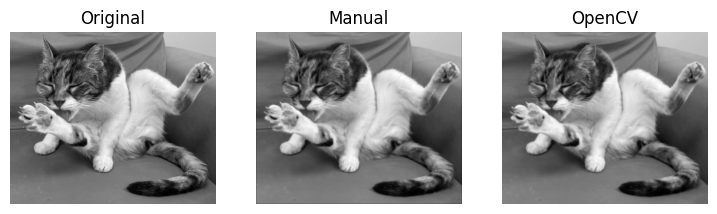

Sharpen 3x3 - MAE: 1.443535, MSE: 145.757515


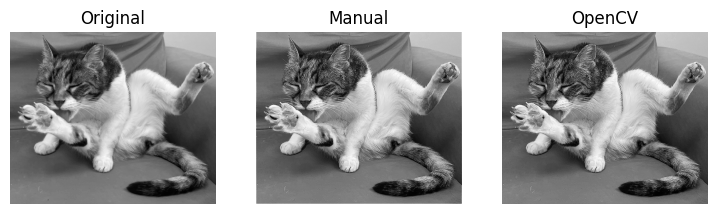

Sobel X 3x3 - MAE: 11.953398, MSE: 1443.652481


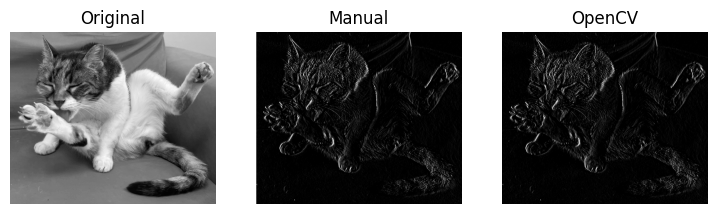

Sobel Y 3x3 - MAE: 15.402010, MSE: 2234.296281


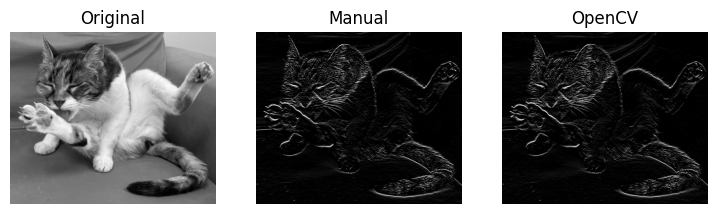

In [80]:
def compare_to_opencv(image, kernel, name):
    manual = manual_convolution(image, kernel)
    opencv = cv2.filter2D(image, ddepth=-1, kernel=kernel)

    manual_to_float = manual.astype(np.float64)
    opencv_to_float = opencv.astype(np.float64)

    mae = np.mean(np.abs(manual_to_float - opencv_to_float))
    mse = np.mean((manual_to_float - opencv_to_float) ** 2)

    print(f"{name} - MAE: {mae:.6f}, MSE: {mse:.6f}")

    plt.figure(figsize=(9, 3))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(fix_image(manual), cmap="gray")
    plt.title("Manual")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(fix_image(opencv), cmap="gray")
    plt.title("OpenCV")
    plt.axis("off")

    plt.show()

compare_to_opencv(image, box_7, "Box 7x7")
compare_to_opencv(image, gauss_7, "Gaussian 7x7")
compare_to_opencv(image, basic_sharpen_kernel, "Sharpen 3x3")
compare_to_opencv(image, sobel_x_kernel, "Sobel X 3x3")
compare_to_opencv(image, sobel_y_kernel, "Sobel Y 3x3")

מסקנה מההשוואה:
בנראות של התמונות, אפשר לראות שההבדלים בין החישובים הידניים לבין הפונקציות המובנות מאוד קטנים והתמונות נראות כמעט זהות.
מבחינה מספרית ניתן לראות שבתמונות שיש בהן טווח רחב של צבעים ההבדלים המספריים יחסית נמוכים, ובתמונות שהצבעים שלהן מאוד חדים (צבעים שהם כהם מאוד או בהירים מאוד) ההבדלים המספריים משמעותית גדולים יותר

Q1.4

gaussian filter produces more excessive smoothing because it gives weights according to the distance of each pixel from the center, so pixels closer to the center have more influence. because of that, edges preserve better.
the box filter gives the same weight to all pixels, which causes more excessive smoothing and as a result, edges are smeared and details are lost.

for example, if we look at the image after applying box filter in size 7x7 versus after applying gaussian filter in size 7x7, we can see that in the box filter, the cat's whiskers almost completely disappear and turn into a grey blur, but with the gaussian filter, even though the whiskers are still blurry, you can see their outlines much more clearly

Q1.5

the small differences between my results and openCV happen because openCV is optimized and might handle rounding or floating point math differently than my manual code. also, even though i used zero padding, there might be small differences in how each method actually processes the pixels right at the edges. That’s why the mse isn't exactly zero.